Saving student_scores.csv to student_scores (4).csv
✅ Dataset Loaded Successfully!

   gender parental_education  study_hours  math  reading  writing
0  female           bachelor          5.0    88       90       85
1    male        high school          3.0    76       78       74
2  female       some college          NaN    90       88       91
3    male             master          4.0    85       82       80
4  female          associate          6.0    92       94       93

📊 Mean, Min, and Max Scores by Gender:

        math            reading            writing        
        mean min max       mean min max       mean min max
gender                                                    
female  90.0  88  92  90.666667  88  94  89.666667  85  93
male    77.0  70  85  77.333333  72  82  74.000000  68  80

📈 Average Scores by Parental Education:

parental_education
associate       93.000000
some college    89.666667
bachelor        87.666667
master          82.333333
high school     73.

/tmp/ipython-input-1352976675.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parent_edu_analysis.index, y=parent_edu_analysis.values, palette='coolwarm')


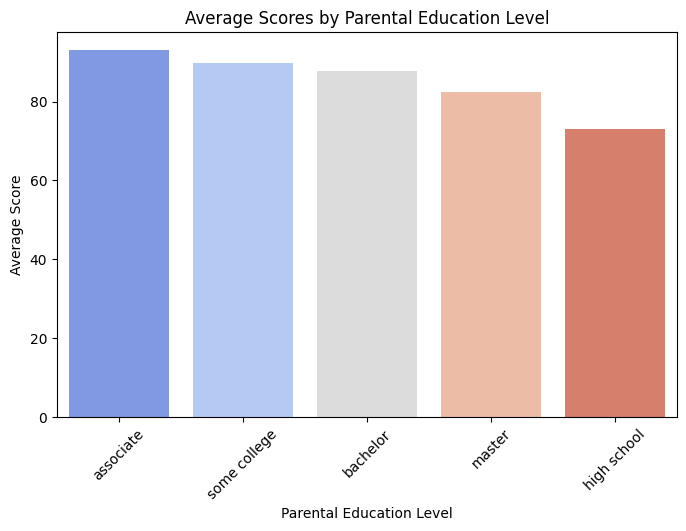


🩺 Missing study_hours before imputation: 2
✅ Missing study_hours after imputation: 0

📚 Average Scores per Subject:
 math       83.500000
reading    84.000000
writing    81.833333
dtype: float64


/tmp/ipython-input-1352976675.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_means.index, y=subject_means.values, palette='viridis')


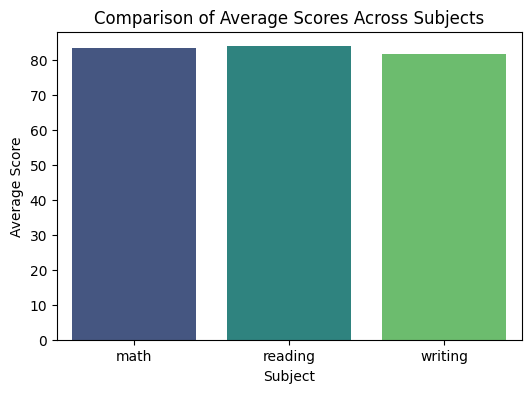

/tmp/ipython-input-1352976675.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_means.index, y=subject_means.values, palette='magma')


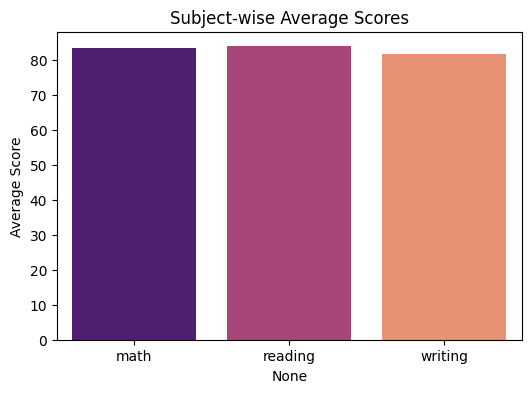

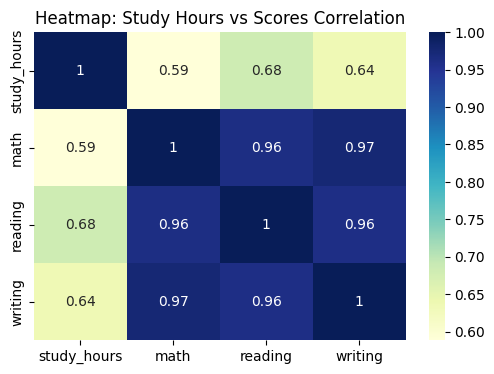


✅ Student Performance Data Analysis Completed Successfully!


In [ ]:
# -------------------- Block-1: Upload CSV and Load Dataset --------------------
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload CSV
uploaded = files.upload()  # select student_scores.csv

# Load dataset
df = pd.read_csv("student_scores.csv")

# Rename columns to match code
df.rename(columns={
    'math_score': 'math',
    'reading_score': 'reading',
    'writing_score': 'writing',
    'parental_level_of_education': 'parental_education'
}, inplace=True, errors='ignore')

print("✅ Dataset Loaded Successfully!\n")
print(df.head())

# -------------------- Block-2: Q1 — Mean, Min, Max Scores by Gender --------------------
gender_stats = df.groupby('gender')[['math', 'reading', 'writing']].agg(['mean', 'min', 'max'])
print("\n📊 Mean, Min, and Max Scores by Gender:\n")
print(gender_stats)

# -------------------- Block-3: Q2 — Effect of Parental Education --------------------
df['average_score'] = df[['math', 'reading', 'writing']].mean(axis=1)
parent_edu_analysis = df.groupby('parental_education')['average_score'].mean().sort_values(ascending=False)
print("\n📈 Average Scores by Parental Education:\n")
print(parent_edu_analysis)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=parent_edu_analysis.index, y=parent_edu_analysis.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Average Scores by Parental Education Level")
plt.xlabel("Parental Education Level")
plt.ylabel("Average Score")
plt.show()

# -------------------- Block-4: Q3 — Handle Missing Study Hours --------------------
print("\n🩺 Missing study_hours before imputation:", df['study_hours'].isnull().sum())
median_hours = df['study_hours'].median()
df['study_hours'] = df['study_hours'].fillna(median_hours)
print("✅ Missing study_hours after imputation:", df['study_hours'].isnull().sum())

# -------------------- Block-5: Q4 — Compare Performance Across Subjects --------------------
subject_means = df[['math', 'reading', 'writing']].mean()
print("\n📚 Average Scores per Subject:\n", subject_means)

plt.figure(figsize=(6,4))
sns.barplot(x=subject_means.index, y=subject_means.values, palette='viridis')
plt.title("Comparison of Average Scores Across Subjects")
plt.xlabel("Subject")
plt.ylabel("Average Score")
plt.show()

# -------------------- Block-6: Q5 — Visualizations --------------------
# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=subject_means.index, y=subject_means.values, palette='magma')
plt.title("Subject-wise Average Scores")
plt.ylabel("Average Score")
plt.show()

# Correlation heatmap
corr = df[['study_hours', 'math', 'reading', 'writing']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Heatmap: Study Hours vs Scores Correlation")
plt.show()

# -------------------- Block-7: Summary --------------------
print("\n✅ Student Performance Data Analysis Completed Successfully!")
